In [1]:
import cv2
import numpy as np
from my_patches import cv2_imshow, show_images

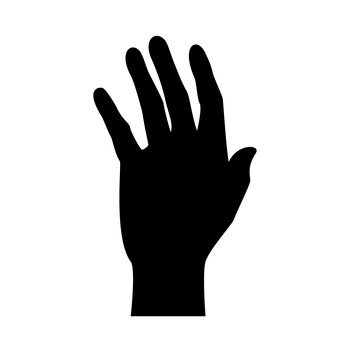

In [8]:
image = cv2.imread("hand4.jpeg")
cv2_imshow(image)

In [9]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

127.0


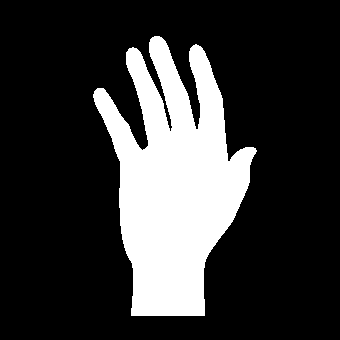

In [10]:
# ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
print(ret)
cv2_imshow(binary)

In [4]:
"""
RetrievalModes
"""
print("Externel contour flag =", cv2.RETR_EXTERNAL)
print("List of contours flag =", cv2.RETR_LIST)
print("Connected Components contour flag =", cv2.RETR_CCOMP)
print("Tree of contours flag =", cv2.RETR_TREE)
print("FloodFill contour flag =", cv2.RETR_FLOODFILL)

Externel contour flag = 0
List of contours flag = 1
Connected Components contour flag = 2
Tree of contours flag = 3
FloodFill contour flag = 4


In [7]:
"""
ContourApproximationModes
"""
print(cv2.CHAIN_APPROX_NONE) # dont approximate
print(cv2.CHAIN_APPROX_SIMPLE) # collect only starting and ending point of a
print(cv2.CHAIN_APPROX_TC89_L1)
print(cv2.CHAIN_APPROX_TC89_KCOS)

1
2
4
3


In [11]:
"""
contours, heirarchy = findContours(image, mode, method)

.   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero 
    pixels remain 0's, so the image is treated as binary.
.   @param mode Contour retrieval mode, see #RetrievalModes
.   @param method Contour approximation method

"""
contours, heirarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

1


In [13]:
hand = contours[0]

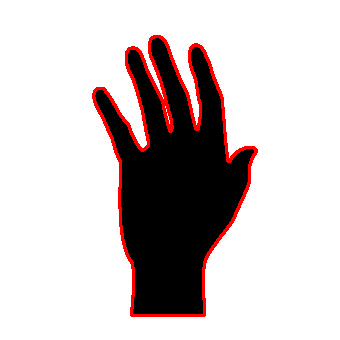

True

In [24]:
"""
drawContours(image, contours, contourIdx, color, thickness) -> image

.   @param image Destination image.
.   @param contours All the input contours. Each contour is stored as a point vector.
.   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
.   @param color Color of the contours.
.   @param thickness Thickness of lines the contours are drawn with. If it is negative (for example,
.   thickness=#FILLED ), the contour interiors are drawn.
"""
image1 = image.copy()
cv2.drawContours(image1,[hand],0,(0,0,255),2)
cv2_imshow(image1)

In [15]:
Area = cv2.contourArea(hand)
int(Area)

24604

In [16]:
M = cv2.moments(hand)

In [17]:
M

{'m00': 24604.5,
 'm10': 4271650.5,
 'm01': 4492849.166666666,
 'm20': 767940566.4166666,
 'm11': 780423648.7083333,
 'm02': 937331537.75,
 'm30': 142532907988.35,
 'm21': 140036700555.25,
 'm12': 162239477777.28333,
 'm03': 213835847492.75,
 'mu20': 26328341.248496056,
 'mu11': 408554.3468852043,
 'mu02': 116924960.31833673,
 'mu30': 66909954.630340576,
 'mu21': -333212941.66917133,
 'mu12': -642266538.1646233,
 'mu03': -25098241.892730713,
 'nu20': 0.04349050097643141,
 'nu11': 0.000674870970959906,
 'nu02': 0.19314263108711047,
 'nu30': 0.0007046190418569349,
 'nu21': -0.0035090172305511716,
 'nu12': -0.006763615895998759,
 'nu03': -0.00026430595047407645}

In [18]:
Area = M['m00']
int(Area)

24604

In [19]:
m10 = int(M['m10'])
m01 = int(M['m01'])
(m10,m01)

(4271650, 4492849)

In [20]:
Cx = int(m10/Area)
Cy = int(m01/Area)

In [21]:
(Cx,Cy)

(173, 182)

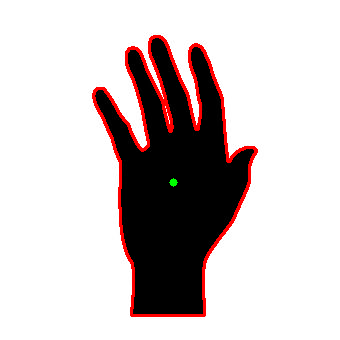

In [22]:
cv2.circle(image1,(Cx,Cy),4,(0,255,0),-1)
cv2_imshow(image1)

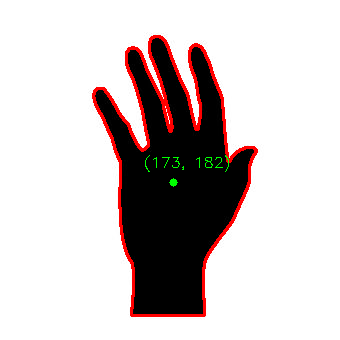

In [23]:
# image2 = image.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image1,f'{Cx,Cy}'.format(),(Cx-30,Cy-15), font, 0.5, (0,255,0), 1)
cv2_imshow(image1)